In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv("Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df['Sales'] = pd.cut(df['Sales'], bins=[0, 8, 12, 16], labels=['Low', 'Medium', 'High'])

In [6]:
df=df.dropna()

In [7]:
df.Sales.describe()

count     398
unique      3
top       Low
freq      235
Name: Sales, dtype: object

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
df["ShelveLoc"].value_counts()

Medium    218
Bad        96
Good       84
Name: ShelveLoc, dtype: int64

<AxesSubplot:>

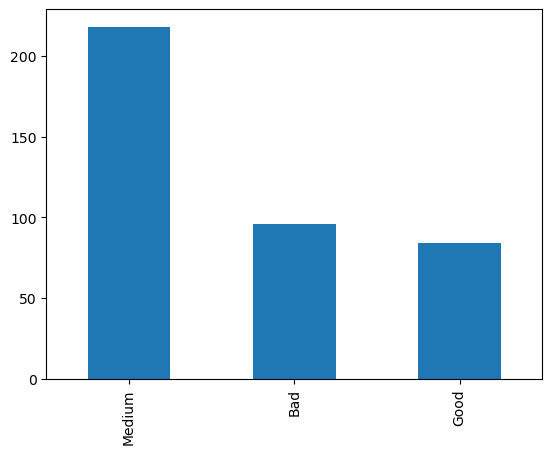

In [10]:
val_counts=df['ShelveLoc'].value_counts()
val_counts.plot.bar()

In [11]:
df["Urban"].value_counts()

Yes    281
No     117
Name: Urban, dtype: int64

<AxesSubplot:>

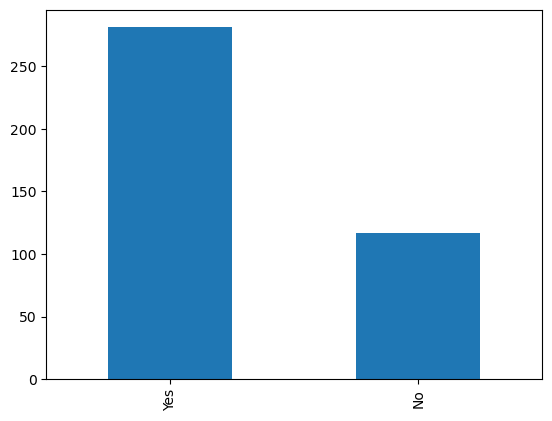

In [12]:
val_counts=df['Urban'].value_counts()
val_counts.plot.bar()

In [13]:
df["US"].value_counts()

Yes    257
No     141
Name: US, dtype: int64

<AxesSubplot:>

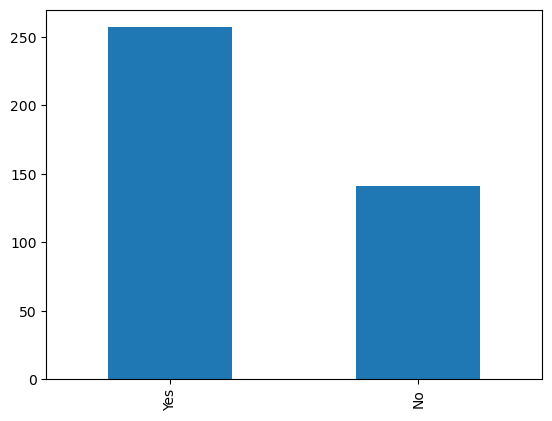

In [14]:
val_counts=df['US'].value_counts()
val_counts.plot.bar()

In [15]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 

In [16]:
label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban'])

In [17]:
label_encoder = preprocessing.LabelEncoder()
df['US']= label_encoder.fit_transform(df['US'])

In [18]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,0,42,17,1,1
1,Medium,111,48,16,260,83,1,65,10,1,1
2,Medium,113,35,10,269,80,2,59,12,1,1
3,Low,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        398 non-null    category
 1   CompPrice    398 non-null    int64   
 2   Income       398 non-null    int64   
 3   Advertising  398 non-null    int64   
 4   Population   398 non-null    int64   
 5   Price        398 non-null    int64   
 6   ShelveLoc    398 non-null    int32   
 7   Age          398 non-null    int64   
 8   Education    398 non-null    int64   
 9   Urban        398 non-null    int32   
 10  US           398 non-null    int32   
dtypes: category(1), int32(3), int64(7)
memory usage: 30.1 KB


In [20]:
df.Sales.unique()

['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [21]:
x=df.iloc[:,1:11]
y=df[["Sales"]]

# Check for Duplicates

In [22]:
df[df.duplicated()].shape

(0, 11)

In [23]:
df[df.duplicated()] # No Duplicate values found

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


# Outlier Detection and Cleaning

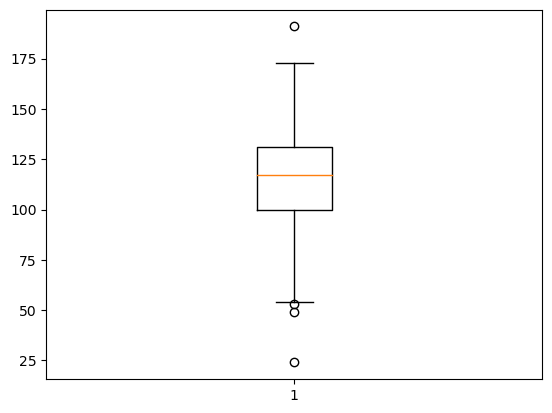

In [24]:
data_box=df.dropna()
data_box1=data_box.Price
plt.boxplot(data_box1)
plt.show()

In [25]:
df.Price.describe()

count    398.000000
mean     115.680905
std       23.450064
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

In [26]:
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1

In [27]:
df = df[~((df['Price'] < (Q1 - 1.5 * IQR)) |(df['Price'] > (Q3 + 1.5 * IQR)))]

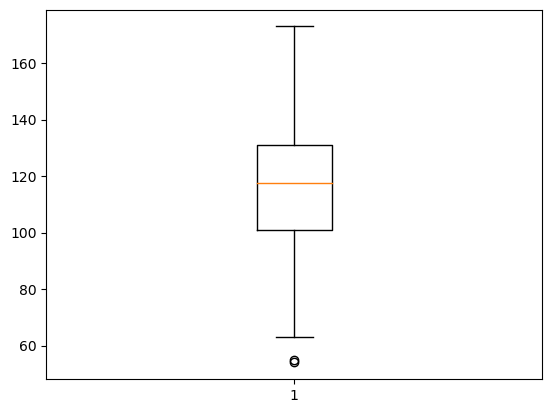

In [28]:
data_box=df.dropna()
data_box1=data_box.Price
plt.boxplot(data_box1)
plt.show()

In [29]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [30]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

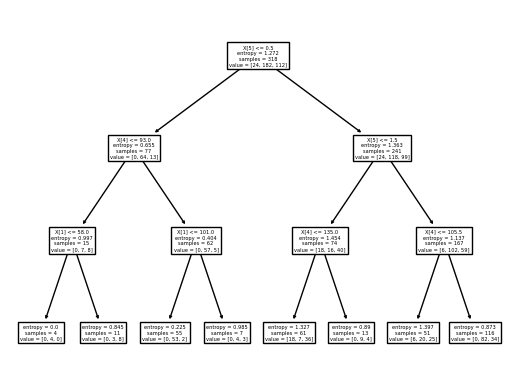

In [31]:
#PLot the decision tree
tree.plot_tree(model);

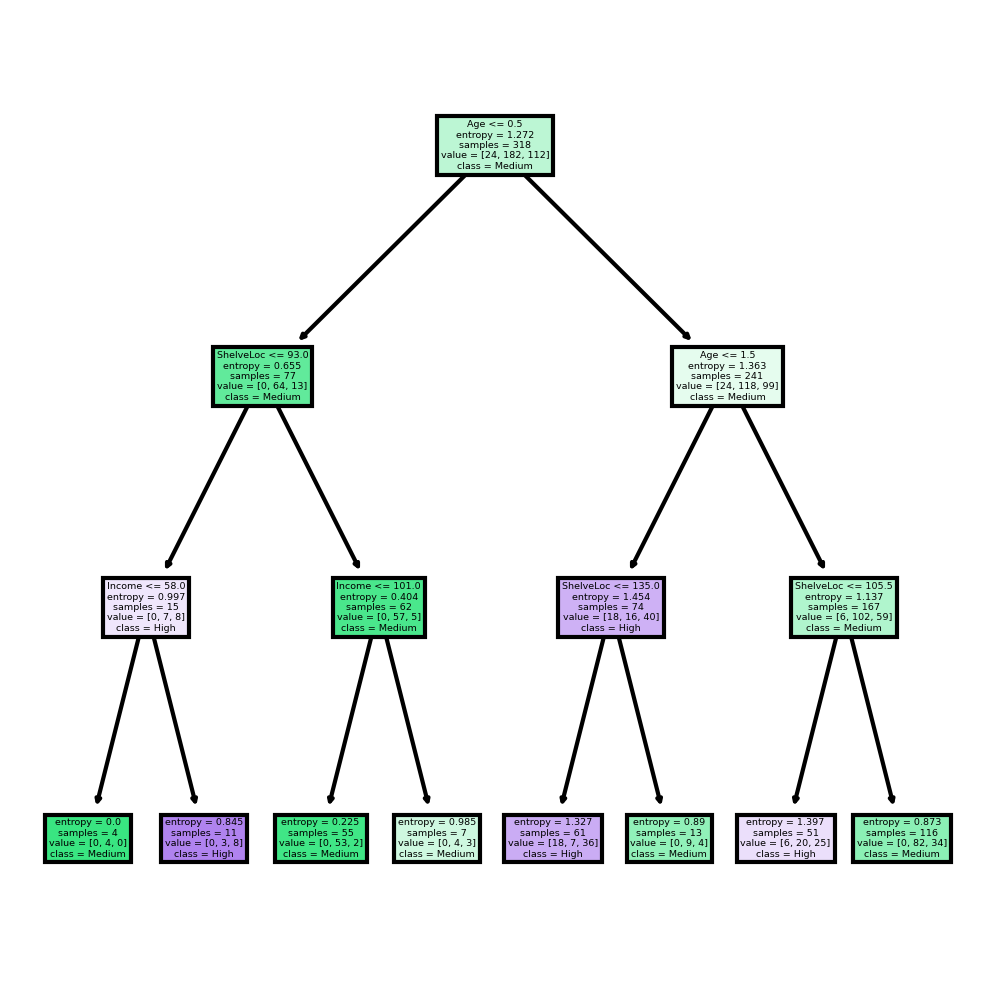

In [32]:
fn=['CompPrice','Income','Advertising','Population','ShelveLoc','Age','Education']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [33]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

Low       51
Medium    29
dtype: int64

In [34]:
preds

array(['Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low',
       'Low'], dtype=object)

In [35]:
df=pd.DataFrame()
df["Actual"]=y_test
df["Prediction"]=preds
df.reset_index(inplace=True,drop=True)

In [36]:
df

,Actual,Prediction
0,Low,Medium
1,Low,Low
2,Low,Medium
3,Low,Low
4,Low,Medium
...,...,...
75,Low,Low
76,Medium,Medium
77,Medium,Low
78,Low,Low


<AxesSubplot:>

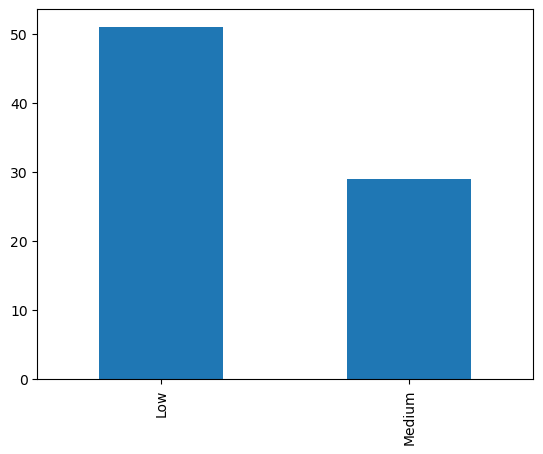

In [37]:
val_counts=df['Actual'].value_counts()
val_counts=df['Prediction'].value_counts()
val_counts.plot.bar()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
         Low       0.83      0.86      0.85        51
      Medium       0.72      0.62      0.67        29

    accuracy                           0.78        80
   macro avg       0.52      0.49      0.50        80
weighted avg       0.79      0.78      0.78        80



C:\Users\thila\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thila\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thila\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Accuracy = 78%